### Random Forest modell

##### Szükséges könyvtárak importálása

Kapcsolódó melléklet: 8, 9, 10.sz. mellékletek

In [56]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [57]:
# Adatok betöltése
df = pd.read_excel("HDI_jo.xlsx")

#### A független változó (HDI) és a függő változó (BMI_mean) kiválasztása

In [58]:
# A független változó (HDI) és a függő változó (BMI_mean) kiválasztása
X = df[['HDI']]  # A független változó, itt csak HDI
y = df['BMI_mean']  # A függő változó, amit előre akarunk jelezni (BMI_mean)

#### Adatok felosztása tanuló és teszt adatokra

In [59]:
# Adatok felosztása tanuló és teszt adatokra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Random Forest Regresszor model betanítása, illesztés

In [60]:
# Random Forest Regresszor létrehozása
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Modell betanítása
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Predikció

In [61]:
# Előrejelzés a teszt adatokra
y_pred = rf_regressor.predict(X_test)

In [62]:
y_pred 

array([26.1606, 32.3668, 27.195 , 32.7845])

#### Modell értékelése

In [17]:
# Modell értékelése
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R^2 érték kiíratása
r2_score = rf_regressor.score(X_test, y_test)
print(f"R^2 Score: {r2_score}")

Mean Squared Error: 5.459013462499963
R^2 Score: -7.216842623166658


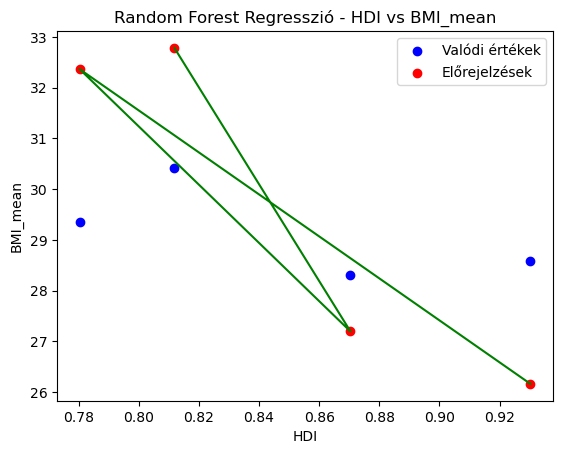

In [18]:
# Eredmények vizualizálása
plt.scatter(X_test, y_test, color='blue', label='Valódi értékek')  # Valódi értékek
plt.scatter(X_test, y_pred, color='red', label='Előrejelzések')  # Előrejelzett értékek
plt.plot(X_test, y_pred, color='green')  # Regressziós vonal
plt.title('Random Forest Regresszió - HDI vs BMI_mean')
plt.xlabel('HDI')
plt.ylabel('BMI_mean')
plt.legend()
plt.show()

##### Finomhangolással és normalizálással

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Adatok normalizálása 

In [21]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Paraméterek finomhangolása GridSearchCV segítségével

In [63]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Legjobb paraméterek és modell kiválasztása
best_rf_model = grid_search.best_estimator_

# Modell alkalmazása
y_pred = best_rf_model.predict(X_test_scaled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


#### Modell értékelése

In [27]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#### Eredmények kiíratása

In [28]:
# Eredmények kiíratása
print(f"Legjobb paraméterek: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Legjobb paraméterek: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 4.161874442213249
Mean Absolute Error (MAE): 1.792902690295806
Root Mean Squared Error (RMSE): 2.040067264139408
R^2 Score: -5.26440428182879


#### Eredmények vizualizálása

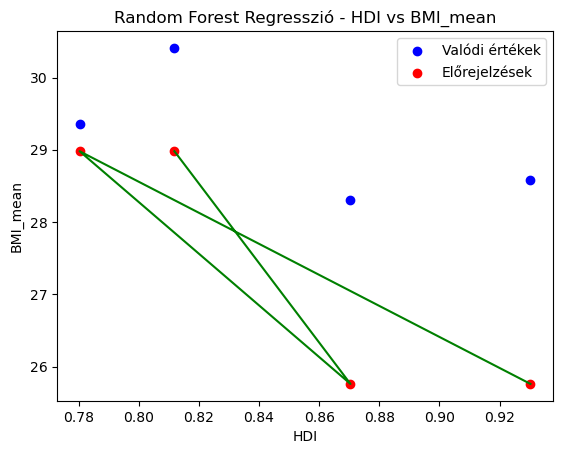

In [29]:
plt.scatter(X_test, y_test, color='blue', label='Valódi értékek')  # Valódi értékek
plt.scatter(X_test, y_pred, color='red', label='Előrejelzések')  # Előrejelzett értékek
plt.plot(X_test, y_pred, color='green')  # Regressziós vonal
plt.title('Random Forest Regresszió - HDI vs BMI_mean')
plt.xlabel('HDI')
plt.ylabel('BMI_mean')
plt.legend()
plt.show()

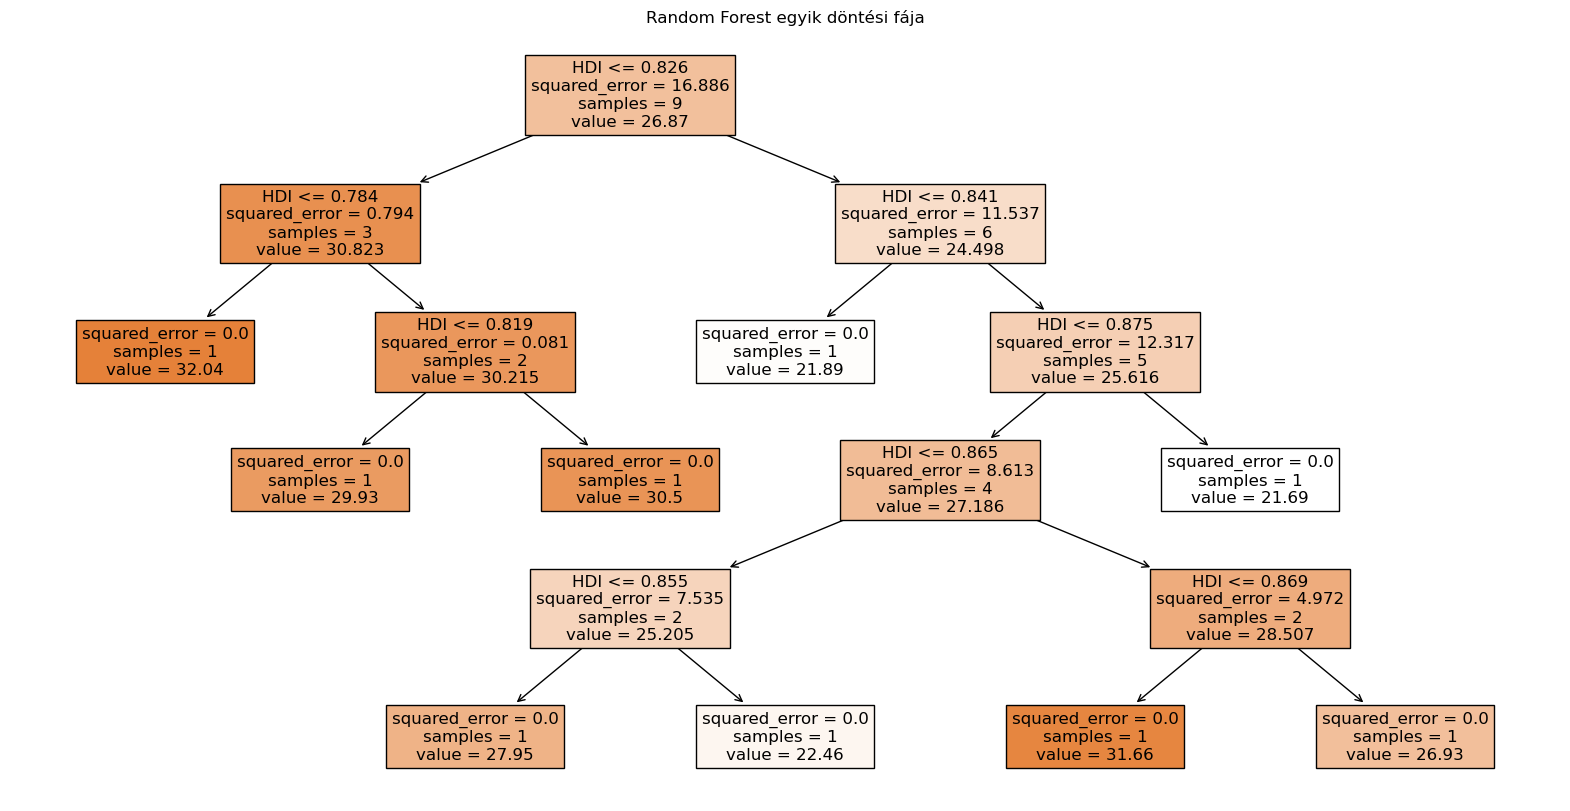

In [73]:
# Döntési fa ábrázolása 

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(rf_regressor.estimators_[0], filled=True, feature_names=X.columns, fontsize=12)
plt.title('Random Forest egyik döntési fája')
plt.show()


### Support Vector Machine

In [65]:
from sklearn.svm import SVR

Support Vector Regresszor létrehozása

In [66]:
svr_regressor = SVR()

##### Paraméterek finomhangolása GridSearchCV segítségével

In [67]:

param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # A kernel típus
    'C': [1, 10, 100],  # A büntetési paraméter
    'epsilon': [0.01, 0.1, 0.2]  # Az epsilon paraméter
}

grid_search = GridSearchCV(estimator=svr_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'epsilon': [0.01, 0.1, 0.2],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=2)

In [68]:
# Legjobb paraméterek és modell kiválasztása
best_svr_model = grid_search.best_estimator_

In [69]:
# Modell alkalmazása
y_pred_2 = best_svr_model.predict(X_test_scaled)

In [70]:
y_pred_2

array([40.02973455, 34.75907113, 25.22433624, 31.24473258])

##### Modell értékelése

In [41]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#### Eredmények kiíratása

In [42]:
print(f"Legjobb paraméterek: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Legjobb paraméterek: {'C': 100, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error (MSE): 42.643142770814706
Mean Absolute Error (MAE): 5.194800504667899
Root Mean Squared Error (RMSE): 6.530171725981998
R^2 Score: -63.18595512027714


#### Eredmények vizualizálása

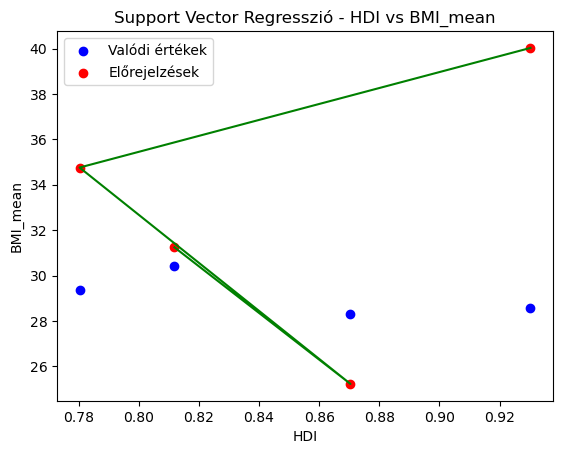

In [44]:
plt.scatter(X_test, y_test, color='blue', label='Valódi értékek')  # Valódi értékek
plt.scatter(X_test, y_pred, color='red', label='Előrejelzések')  # Előrejelzett értékek
plt.plot(X_test, y_pred, color='green')  # Regressziós vonal
plt.title('Support Vector Regresszió - HDI vs BMI_mean')
plt.xlabel('HDI')
plt.ylabel('BMI_mean')
plt.legend()
plt.show()

### Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

Gradient Boosting Regresszor létrehozása

In [47]:
gbr = GradientBoostingRegressor(random_state=42)

#### Paraméterek finomhangolása GridSearchCV segítségével

In [48]:
# Paraméterek finomhangolása GridSearchCV segítségével
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

##### Legjobb paraméterek és modell kiválasztása

In [53]:
best_gbr_model = grid_search.best_estimator_

# Modell alkalmazása
y_pred_3 = best_gbr_model.predict(X_test_scaled)

In [54]:
y_pred_3

array([25.97287073, 33.40509512, 27.62476575, 33.40509512])

#### Modell értékelése

In [50]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

#### Eredmények kiíratása

In [51]:
print(f"Legjobb paraméterek: {grid_search.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Legjobb paraméterek: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error (MSE): 8.170265055498616
Mean Absolute Error (MAE): 2.585638440677439
Root Mean Squared Error (RMSE): 2.858367550805637
R^2 Score: -11.29778651614574
